# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 615


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
#https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={API key}
url = f"https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | fonadhoo
City not found. Skipping...
Processing Record 2 of Set 1 | petropavlovsk-kamchatsky
Processing Record 3 of Set 1 | boone
Processing Record 4 of Set 1 | edinburgh of the seven seas
Processing Record 5 of Set 1 | boke
Processing Record 6 of Set 1 | tranovaho
City not found. Skipping...
Processing Record 7 of Set 1 | adamstown
Processing Record 8 of Set 1 | lospalos
Processing Record 9 of Set 1 | port elizabeth
Processing Record 10 of Set 1 | shimoda
Processing Record 11 of Set 1 | arraial do cabo
Processing Record 12 of Set 1 | diego de almagro
Processing Record 13 of Set 1 | bredasdorp
Processing Record 14 of Set 1 | saint-joseph
Processing Record 15 of Set 1 | albany
Processing Record 16 of Set 1 | pantai cenang
City not found. Skipping...
Processing Record 17 of Set 1 | taiohae
City not found. Skipping...
Processing Record 18 of Set 1 | anna regina
Processing Record 19 of Set 1 | inverc

Processing Record 38 of Set 4 | el estor
Processing Record 39 of Set 4 | dowagiac
Processing Record 40 of Set 4 | georgetown
Processing Record 41 of Set 4 | bereket
Processing Record 42 of Set 4 | whitehorse
Processing Record 43 of Set 4 | hithadhoo
Processing Record 44 of Set 4 | ola
Processing Record 45 of Set 4 | yeed
Processing Record 46 of Set 4 | somerset east
Processing Record 47 of Set 4 | yantai
Processing Record 48 of Set 4 | tawau
Processing Record 49 of Set 4 | jingdezhen
Processing Record 0 of Set 5 | vorgashor
Processing Record 1 of Set 5 | happy valley-goose bay
Processing Record 2 of Set 5 | dapa
Processing Record 3 of Set 5 | hamilton
Processing Record 4 of Set 5 | san clemente del tuyu
Processing Record 5 of Set 5 | afaahiti
Processing Record 6 of Set 5 | constantia
Processing Record 7 of Set 5 | lebedyn
Processing Record 8 of Set 5 | yermentau
Processing Record 9 of Set 5 | zvenigovo
Processing Record 10 of Set 5 | livingstone
Processing Record 11 of Set 5 | iquitos


Processing Record 31 of Set 8 | verkhnevilyuysk
Processing Record 32 of Set 8 | solwezi
Processing Record 33 of Set 8 | kyshtovka
Processing Record 34 of Set 8 | pacific grove
Processing Record 35 of Set 8 | satka
Processing Record 36 of Set 8 | leava
Processing Record 37 of Set 8 | santiago de cao
Processing Record 38 of Set 8 | arar
Processing Record 39 of Set 8 | marine corps base hawaii - mcbh
Processing Record 40 of Set 8 | moanda
Processing Record 41 of Set 8 | alaghsas
Processing Record 42 of Set 8 | geraldton
Processing Record 43 of Set 8 | saint-philippe
Processing Record 44 of Set 8 | omagh
Processing Record 45 of Set 8 | monteagudo
Processing Record 46 of Set 8 | bel ombre
Processing Record 47 of Set 8 | camana
Processing Record 48 of Set 8 | quellon
Processing Record 49 of Set 8 | poxoreo
Processing Record 0 of Set 9 | victorica
Processing Record 1 of Set 9 | huarmey
Processing Record 2 of Set 9 | marksville
Processing Record 3 of Set 9 | tabas
Processing Record 4 of Set 9 

Processing Record 18 of Set 12 | wucheng
Processing Record 19 of Set 12 | edd
Processing Record 20 of Set 12 | tazovsky
Processing Record 21 of Set 12 | hobyo
Processing Record 22 of Set 12 | yacuiba
Processing Record 23 of Set 12 | ayutinskiy
Processing Record 24 of Set 12 | kabompo
Processing Record 25 of Set 12 | cidreira
Processing Record 26 of Set 12 | boguchany
Processing Record 27 of Set 12 | almirante tamandare
Processing Record 28 of Set 12 | tabou
Processing Record 29 of Set 12 | ettenheim
Processing Record 30 of Set 12 | letterkenny
Processing Record 31 of Set 12 | yichang
Processing Record 32 of Set 12 | lompoc
Processing Record 33 of Set 12 | el idrissia
Processing Record 34 of Set 12 | mancio lima
Processing Record 35 of Set 12 | phek
Processing Record 36 of Set 12 | saint-pierre
Processing Record 37 of Set 12 | port-vila
Processing Record 38 of Set 12 | whakatane
Processing Record 39 of Set 12 | omuthiya
City not found. Skipping...
Processing Record 40 of Set 12 | red bl

In [15]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          587
Lat           587
Lng           587
Max Temp      587
Humidity      587
Cloudiness    587
Wind Speed    587
Country       587
Date          587
dtype: int64

In [16]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,petropavlovsk-kamchatsky,53.0452,158.6483,286.48,30,0,3.00,RU,1684027735
1,boone,39.0334,-92.3335,301.62,83,100,2.49,US,1684027469
2,edinburgh of the seven seas,-37.0676,-12.3116,291.10,97,100,9.99,SH,1684027183
3,boke,10.9409,-14.2967,299.02,83,100,1.34,GN,1684027737
4,adamstown,-25.0660,-130.1015,296.29,69,100,8.16,PN,1684027043


In [17]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [18]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,petropavlovsk-kamchatsky,53.0452,158.6483,286.48,30,0,3.00,RU,1684027735
1,boone,39.0334,-92.3335,301.62,83,100,2.49,US,1684027469
2,edinburgh of the seven seas,-37.0676,-12.3116,291.10,97,100,9.99,SH,1684027183
3,boke,10.9409,-14.2967,299.02,83,100,1.34,GN,1684027737
4,adamstown,-25.0660,-130.1015,296.29,69,100,8.16,PN,1684027043


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

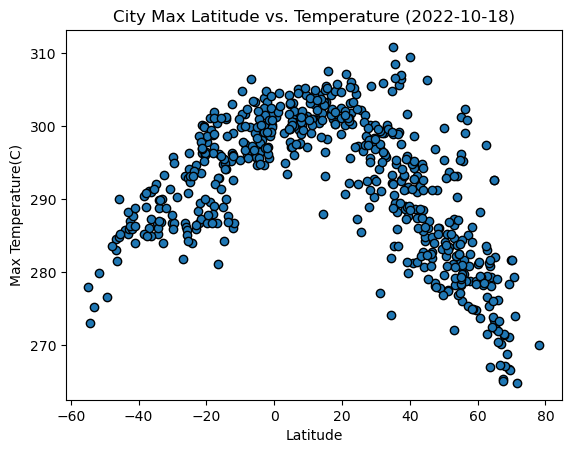

In [19]:
# Build scatter plot for latitude vs. temperature
lat=city_data_df.loc[:,'Lat']
temp=city_data_df.loc[:,'Max Temp']


plt.scatter(lat,temp,edgecolors='black') 

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Temperature (2022-10-18)')
plt.ylabel('Max Temperature(C)')
plt.xlabel('Latitude')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

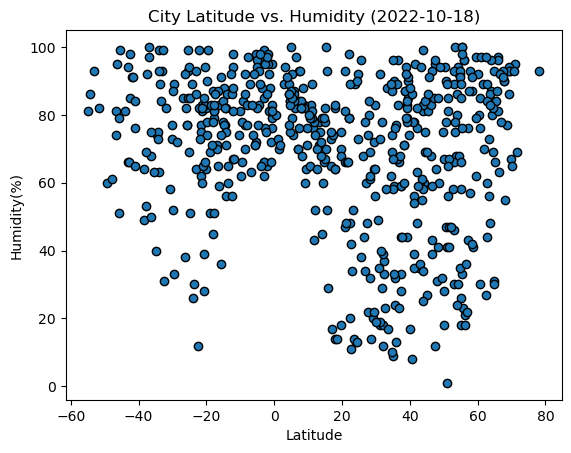

In [20]:
# Build the scatter plots for latitude vs. humidity
humidity=city_data_df.loc[:,'Humidity']

plt.scatter(lat,humidity,edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity (2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

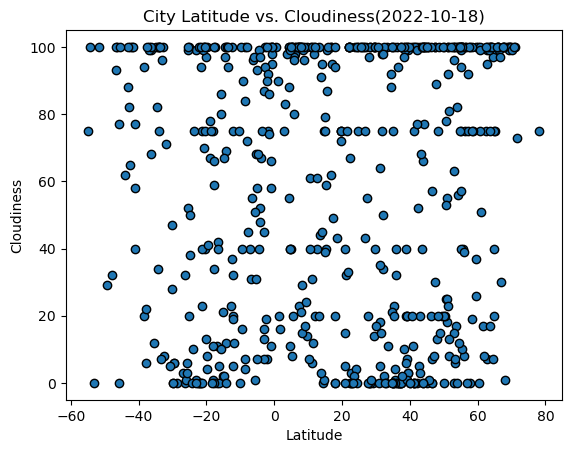

In [21]:
# Build the scatter plots for latitude vs. cloudiness
cloudiness=city_data_df.loc[:,'Cloudiness']

plt.scatter(lat,cloudiness,edgecolors='black')

# Incorporate the other graph properties

plt.title('City Latitude vs. Cloudiness(2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

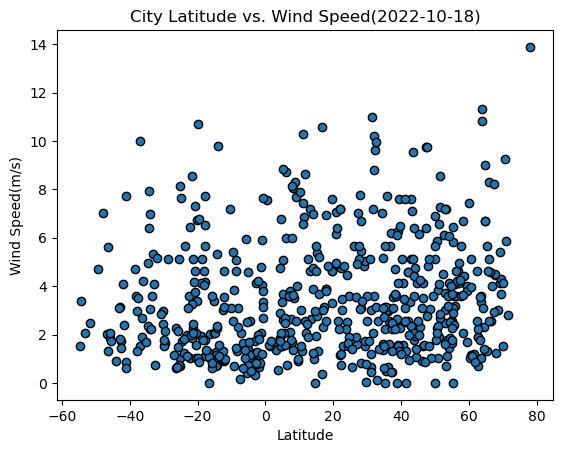

In [22]:
# Build the scatter plots for latitude vs. wind speed
speed=city_data_df.loc[:,'Wind Speed']

plt.scatter(lat,speed,edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed(2022-10-18)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(m/s)')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [192]:
# Define a function to create Linear Regression plots
def linear_reg_plt(xvalues,yvalues):
    (slope,intercept,pvalue,rvalue,stderr)=linregress(xvalues,yvalues)
    regress_values=xvalues*slope+intercept
    line_eq='y=' + str(round(slope,2)) + 'x+' + str(round(intercept,2))
    plt.scatter(xvalues,yvalues,)
    plt.plot(xvalues,regress_values,'r-')
    plt.annotate(f'{line_eq}',(xvalues.mean(),yvalues.min()),color='red')
    print(f'The r-value is:{rvalue}')
    plt.xlabel('Latitude')
    plt.show()

In [209]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df.loc[city_data_df['Lat']>0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,petropavlovsk-kamchatsky,53.0452,158.6483,286.48,30,0,3.00,RU,1684027735
1,boone,39.0334,-92.3335,301.62,83,100,2.49,US,1684027469
3,boke,10.9409,-14.2967,299.02,83,100,1.34,GN,1684027737
7,shimoda,34.6667,138.9500,293.35,74,100,5.17,JP,1684027739
12,albany,42.6001,-73.9662,291.73,35,5,3.35,US,1684027485


In [208]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df.loc[city_data_df['Lat']<0,:]


# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,edinburgh of the seven seas,-37.0676,-12.3116,291.10,97,100,9.99,SH,1684027183
4,adamstown,-25.0660,-130.1015,296.29,69,100,8.16,PN,1684027043
5,lospalos,-8.5186,127.0025,297.55,70,100,5.07,TL,1684027738
6,port elizabeth,-33.9180,25.5701,288.76,99,100,2.24,ZA,1684027738
8,arraial do cabo,-22.9661,-42.0278,294.73,64,99,1.99,BR,1684027739


###  Temperature vs. Latitude Linear Regression Plot

The r-value is:1.5445527736107013e-88


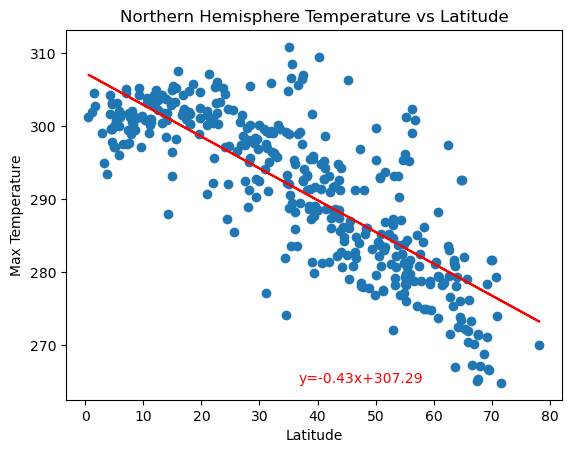

In [210]:
# Linear regression on Northern Hemisphere
xvalues=northern_hemi_df.loc[:,'Lat']
yvalues=northern_hemi_df.loc[:,'Max Temp']

plt.title(f'Northern Hemisphere Temperature vs Latitude')
plt.ylabel('Max Temperature')
linear_reg_plt(xvalues,yvalues)


The r-value is:3.4333832602662367e-41


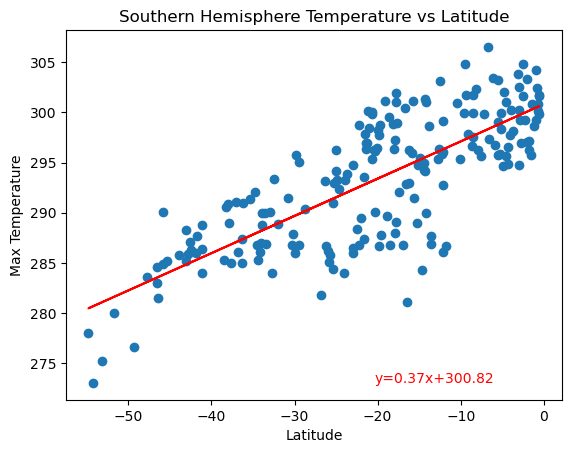

In [211]:
# Linear regression on Southern Hemisphere
xvalues=southern_hemi_df.loc[:,'Lat']
yvalues=southern_hemi_df.loc[:,'Max Temp']

plt.title(f'Southern Hemisphere Temperature vs Latitude')
plt.ylabel('Max Temperature')
linear_reg_plt(xvalues,yvalues)

**Discussion about the linear relationship:** Comparing the max temperature vs. northern/southern cities. There is a strong correlation between where cities are located based on their geographic location and the temperature. 



### Humidity vs. Latitude Linear Regression Plot

The r-value is:0.852913602476858


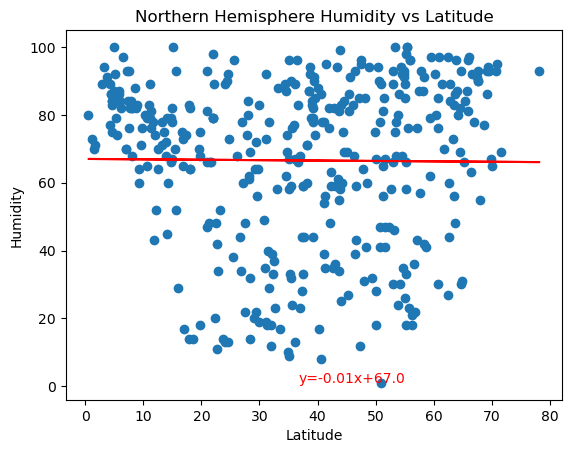

In [212]:
# Northern Hemisphere
xvalues=northern_hemi_df.loc[:,'Lat']
yvalues=northern_hemi_df.loc[:,'Humidity']

plt.title(f'Northern Hemisphere Humidity vs Latitude')
plt.ylabel('Humidity')
linear_reg_plt(xvalues,yvalues)

The r-value is:0.125595978530068


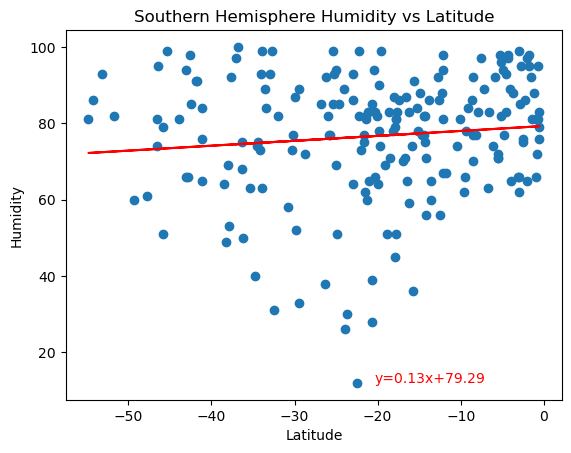

In [213]:
# Southern Hemisphere
xvalues=southern_hemi_df.loc[:,'Lat']
yvalues=southern_hemi_df.loc[:,'Humidity']

plt.title(f'Southern Hemisphere Humidity vs Latitude')
plt.ylabel('Humidity')
linear_reg_plt(xvalues,yvalues)

**Discussion about the linear relationship:** Correlation is weak between humidity and temperature. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is:0.18485130048211887


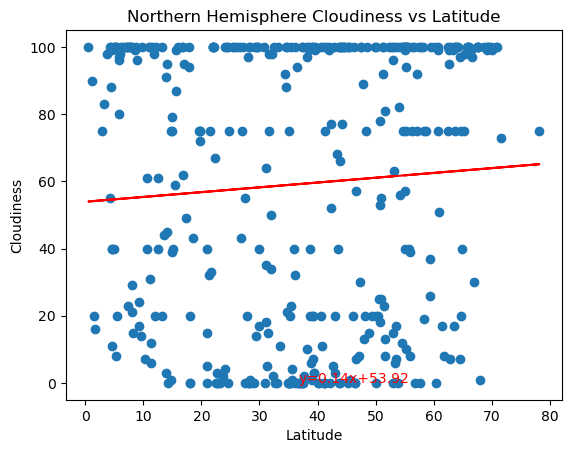

In [214]:
# Northern Hemisphere
xvalues=northern_hemi_df.loc[:,'Lat']
yvalues=northern_hemi_df.loc[:,'Cloudiness']

plt.title(f'Northern Hemisphere Cloudiness vs Latitude')
plt.ylabel('Cloudiness')
linear_reg_plt(xvalues,yvalues)

The r-value is:0.5569527199122857


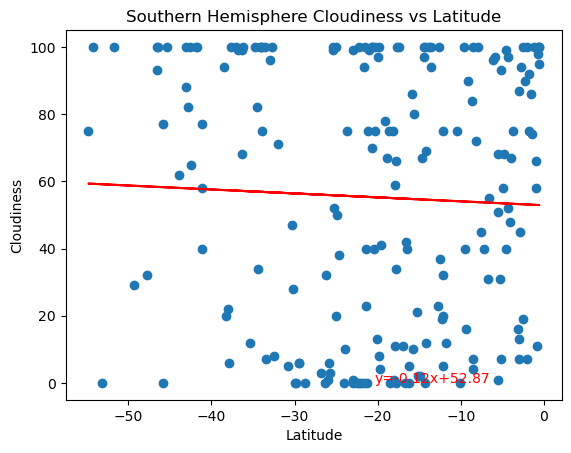

In [215]:
# Southern Hemisphere
xvalues=southern_hemi_df.loc[:,'Lat']
yvalues=southern_hemi_df.loc[:,'Cloudiness']

plt.title(f'Southern Hemisphere Cloudiness vs Latitude')
plt.ylabel('Cloudiness')
linear_reg_plt(xvalues,yvalues)

**Discussion about the linear relationship:** Correlation between cloudiness and temperature is also weak. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is:0.5275811888849595


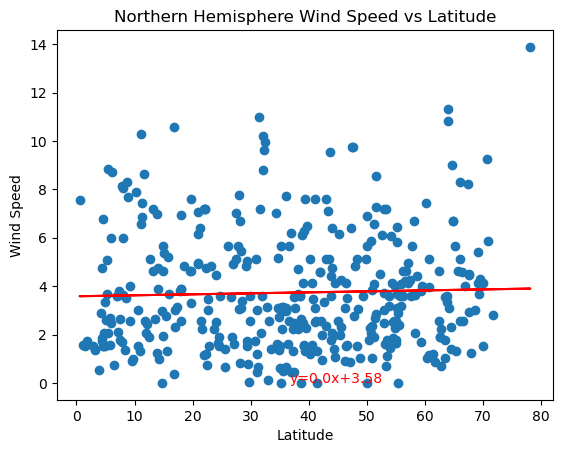

In [216]:
# Northern Hemisphere
xvalues=northern_hemi_df.loc[:,'Lat']
yvalues=northern_hemi_df.loc[:,'Wind Speed']

plt.title(f'Northern Hemisphere Wind Speed vs Latitude')
plt.ylabel('Wind Speed')
linear_reg_plt(xvalues,yvalues)

The r-value is:0.04978482922193461


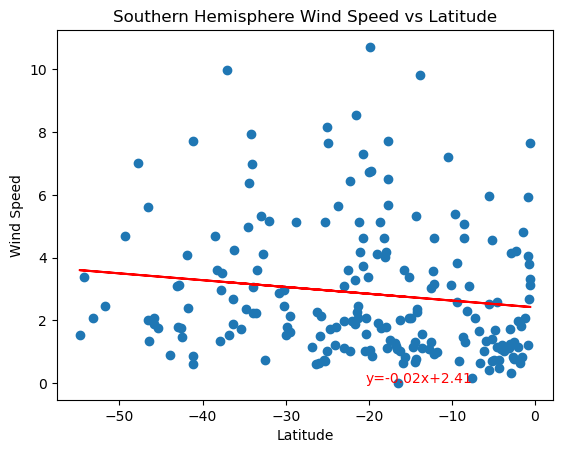

In [217]:
# Southern Hemisphere
xvalues=southern_hemi_df.loc[:,'Lat']
yvalues=southern_hemi_df.loc[:,'Wind Speed']

plt.title(f'Southern Hemisphere Wind Speed vs Latitude')
plt.ylabel('Wind Speed')
linear_reg_plt(xvalues,yvalues)